In [1]:
import Polyomino as py
import scanpy as sc
import numpy as np
import pandas as pd
import sys
sys.path.append('./')
from utils import evaluation_metric,save_results,calculate_spatial_similarity,calculate_spatial_similarity_in_grids

In [3]:
E1L1_simu_st_raw = sc.read_h5ad('../F3/data/st_STARMAP.h5ad')

In [4]:
E1L1_sc = sc.read_h5ad('../F3/data/scadata_for_STARMAP_compress.h5ad')

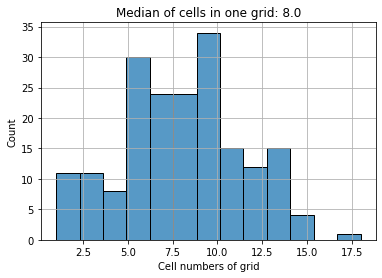

In [5]:
E1L1_simu_st = py.generate_grid(E1L1_simu_st_raw,width=750)

In [6]:
plmo_object = py.Polyomino(E1L1_sc,E1L1_simu_st,cluster_time=1,device='cpu')
plmo_object.allocate()

Running 1-th clustering.
Running 1-th mapping.
Total loss: -1.160
Total loss: -1.260
Total loss: -1.265
Total loss: -1.266
Total loss: -1.266
Starting spot mapping.
Total loss: -1.850
Total loss: -1.945
Total loss: -1.947
Total loss: -1.947
Total loss: -1.947
Spot mapping completed.
Mapping matrix saved in zm.spot_matrix


In [7]:
cell_alocated_data = py.sc2sc(E1L1_sc, E1L1_simu_st_raw, plmo_object.spot_matrix,thres=0.1,method='max')

100%|██████████| 189/189 [00:05<00:00, 32.35it/s]


In [10]:
cell_alocated_data.uns['celltype_colors'] = ['#377EB8',
 '#DE9CDB',
 '#FFD400',
 '#FFA400',
 '#FF0901',
 '#8C0000',
#  '#CEC983',
 '#325456',
#  '#930099',
 '#B5BD61',
 '#686868','#686868',
 '#0C068F',
 '#028584',
 '#2CD028','#C49C94',
 '#00B6FF']

In [13]:
sc.set_figure_params(dpi=150)

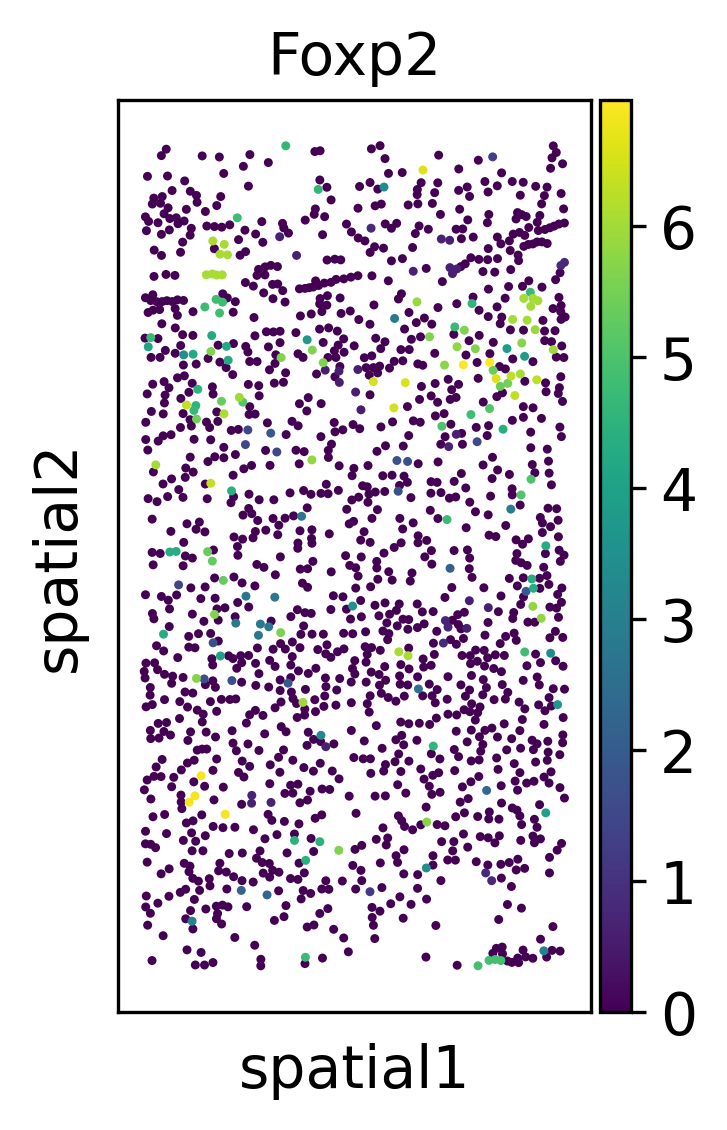

In [20]:
sc.pl.spatial(cell_alocated_data,color='Foxp2',spot_size=150)

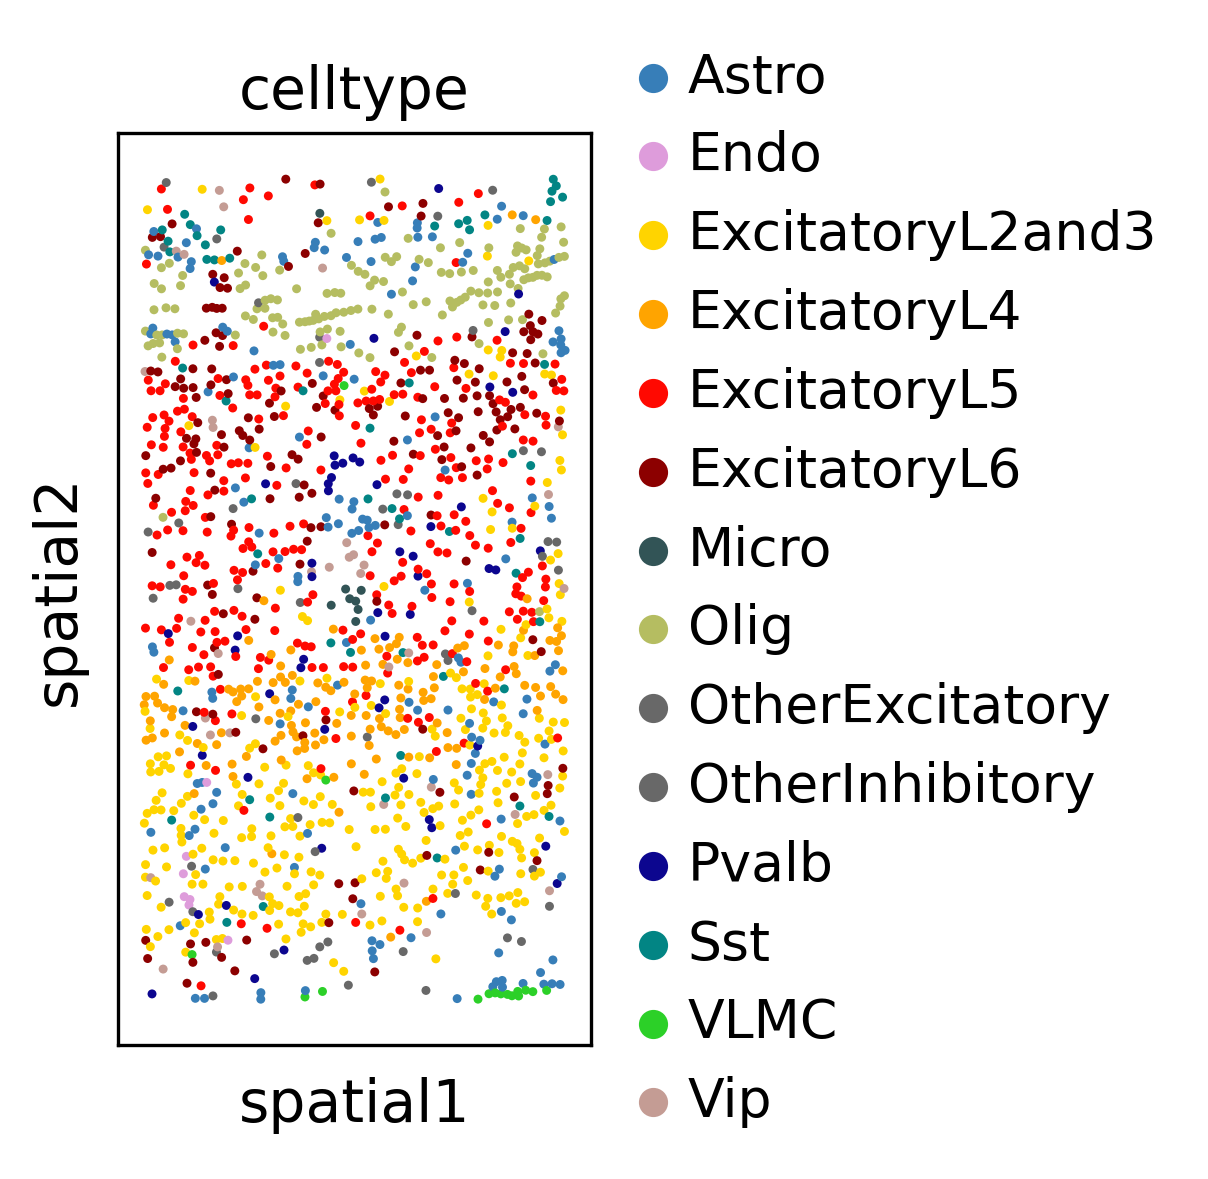

In [15]:
sc.pl.spatial(cell_alocated_data,color='celltype',spot_size=150)

In [24]:
cell_alocated_data.write_h5ad('./polyomino_result.h5ad')

In [21]:
correlation_df = calculate_spatial_similarity_in_grids(E1L1_simu_st_raw, cell_alocated_data, cell_type_col='celltype', metric='pearson',grid_size=750)

In [22]:
correlation_df

,Spatial Correlation
ExcitatoryL4,0.870124
ExcitatoryL2and3,0.843470
ExcitatoryL6,0.616628
Olig,0.884229
Endo,0.336739
ExcitatoryL5,0.423048
Micro,-0.023002
Astro,0.573329
Other,NaN
HPC,NaN


In [23]:
correlation_df.to_csv('./polyomino_corr.csv')